238.29847041728445


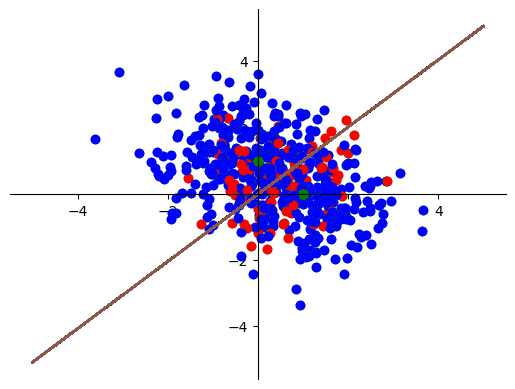

1) Ntest = 546
189.28720334405796


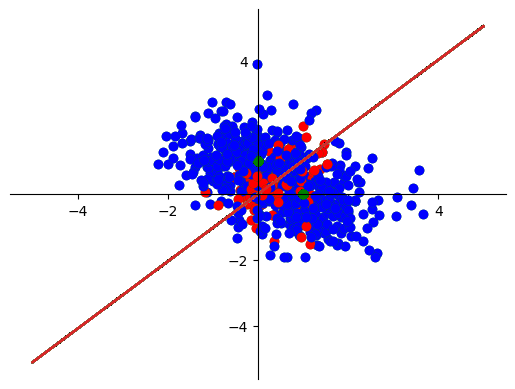

2) Ntest = 664
150.3561700881817


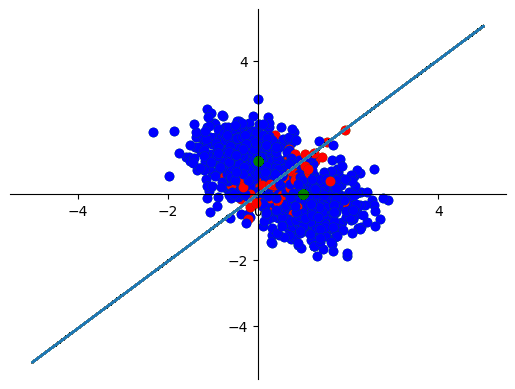

3) Ntest = 1071
119.43215116604918


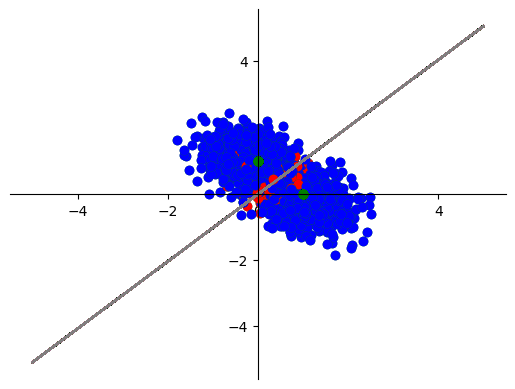

4) Ntest = 1428
94.86832980505137


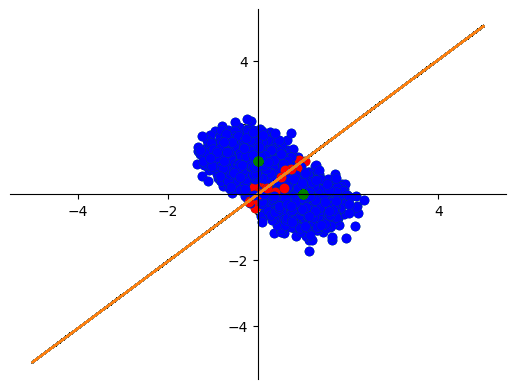

5) Ntest = 3492
75.3565929452874


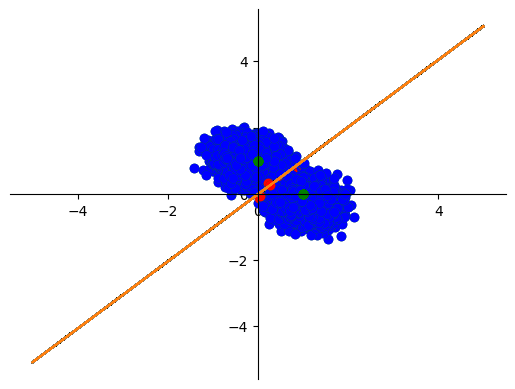

6) Ntest = 18052


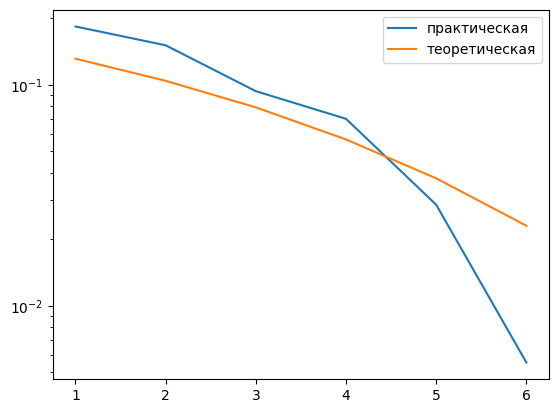

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

f0 = 980
f1 = 1180
Vmod = 300
Vinf = 300
E = 1

T = 1 / Vmod
m = Vinf * T
q = 2**m
Pteor = []
dt = 1 / f0 / 60
t = np.arange(0, T, dt)

S1 = lambda t: np.sqrt(2*E/T) * np.cos(2 * np.pi * f0 * t)
S2 = lambda t: np.sqrt(2*E/T) * np.cos(2 * np.pi * f1 * t)

S1vector = S1(t)
S2vector = S2(t)

def Q(x):
    return (0.5*np.exp(-(x**2)/2))

def Q2(x):
    return math.erfc(x/(2**0.5))/2

x1 = np.trapz(S1(t) * S1(t), t, dt)
y1 = np.trapz(S1(t) * S2(t), t, dt)
x2 = np.trapz(S2(t) * S1(t), t, dt)
y2 = np.trapz(S2(t) * S2(t), t, dt)

k = (y1 - y2) / (x1 - x2)

perp = lambda x: -(1/k)*(x-(x1 + x2)/2)+(y1 + y2)/2

mean = 1
Ydb = [1, 2, 3, 4, 5, 6]

Po = []
Psignal1 = 0
Psignal2 = 0

for i in t:
    Psignal1 += S1(i) * S1(i)
    Psignal2 += S2(i) * S2(i)

Psignal1 = Psignal1 /len(t)
Psignal2 = Psignal2 /len(t)

for Ytemp in Ydb:
    Y = 10 ** (Ytemp / 10)
    Nerrmax = 100
    Nerr = 0
    Ntest = 0
    print(Psignal1 / Y)
    while Nerr < Nerrmax:
        tmp = random.randint(0, 1)
        r = []
        rIncorrect = []
        noise = np.random.normal(0, Psignal1 / Y, size=len(t))
        
        currSignal = None
        for i in range(0, len(noise)):
            if tmp == 0:
                # currSignal = S1vector[i] + noise[i]
                r.append(S1vector[i] + noise[i])
            if tmp == 1:
                # currSignal = S2vector[i] + noise[i]
                r.append(S2vector[i] + noise[i]) 

        resX = 0
        resY = 0

        for i in range(0, len(t)):
            resX += r[i] * S1vector[i] * dt
            resY += r[i] * S2vector[i] * dt

        

        ax = plt.gca()

        ax.spines['left'].set_position('center')
        ax.spines['bottom'].set_position('center')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        foundError = False
        
        if tmp == 0:
            if resY > perp(resX):
                Nerr += 1
                foundError = True

        if resY == perp(resX):
            Nerr +=1
            foundError = True

        if tmp == 1:
            if resY < perp(resX):
                Nerr += 1
                foundError = True

        Ntest += 1
        if (foundError):
            # rIncorrect.append(currSignal)
            plt.plot([x1, math.ceil(x2), resX], [math.ceil(y1), y2, resY], 'go', resX, resY, 'ro', [-5, 5, -5, 5], perp([-5, 5, -5, 5]))
        else:
            # r.append(currSignal)
            plt.plot([x1, math.ceil(x2), resX], [math.ceil(y1), y2, resY], 'go', resX, resY, 'bo', [-5, 5, -5, 5], perp([-5, 5, -5, 5]))
        
        
    plt.show()
    Po.append(Nerrmax/Ntest)
    print(Ytemp, ') Ntest = ', Ntest, sep='')
    # Pteor.append(np.exp(-(3*Psignal1)/((2*(q-1)*Psignal1/Y))))
    Pteor.append((q-1)*Q2(np.sqrt(Psignal1/(Psignal1/Y))))

line1 = plt.plot(Ydb, Po,label = 'практическая')
line2 = plt.plot(Ydb, Pteor,label = 'теоретическая')

plt.legend()
plt.yscale('log')
plt.show()
